# Bank Customer Churn

# Objective: The objective of this project is to predict customer churn in a bank using machine learning techniques.

# Data Source: The data used in this project is sourced from the 'Bank Churn Modelling.csv' dataset. 

## Import Library:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from hyperopt import hp, fmin, tpe, Trials
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.stats import ttest_ind

# Smoothing out the import for readability
from sklearn.metrics import f1_score as f1
from sklearn.ensemble import RandomForestClassifier as RF

import warnings
warnings.filterwarnings("ignore")

## Import Data:

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

In [3]:
df = pd.read_csv('Bank Churn Modelling.csv')

## Describe Data:

In [4]:
df.replace({'Geography':{'France': 2, 'Germany':1, 'Spain':0}},inplace=True)

In [5]:
df.replace({'Gender': {'Male': 0, 'Female':1}},inplace=True)

In [6]:
df.replace({'Num Of Products':{1:0, 2:1, 3:1, 4:1}}, inplace = True )

In [7]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1
1,15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0
2,15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1
3,15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0
4,15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0


In [8]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df.shape[1], df.shape[0]))

The shape of the dataframe is: 13 columns and 10,000 rows


In [9]:
df.dtypes.value_counts()

int64      10
float64     2
object      1
Name: count, dtype: int64

In [10]:
# Checking NULL
null_count = sum(df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


In [11]:
# Check basic statistics, although difficult to go into detail with so many columns
df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,1.253700,0.454300,38.921800,5.012800,76485.889288,0.491600,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.499954,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,2.000000,0.000000,37.000000,5.000000,97198.540000,0.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,1.000000,1.00000,1.000000,149388.247500,0.000000


In [12]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  int64  
 4   Gender            10000 non-null  int64  
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1015.8+ KB


In [14]:
df['Geography'].value_counts()

Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [16]:
df['Num Of Products'].value_counts()

Num Of Products
0    5084
1    4916
Name: count, dtype: int64

In [17]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [18]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [19]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

In [20]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
df = pd.get_dummies(df, drop_first=True)

## Data Visualization:

<Axes: >

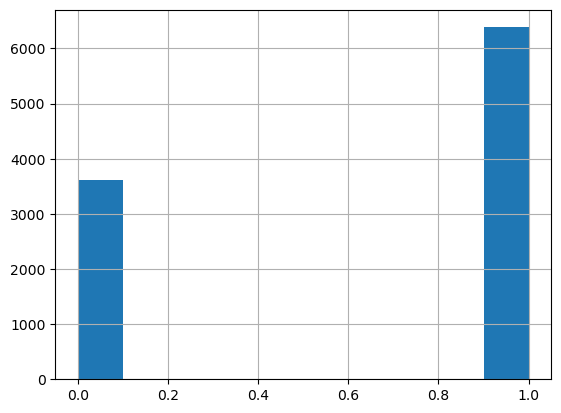

In [21]:
df['Zero Balance'].hist()

## Visualizing Count of Customer Churn with a Seaborn Countplot  

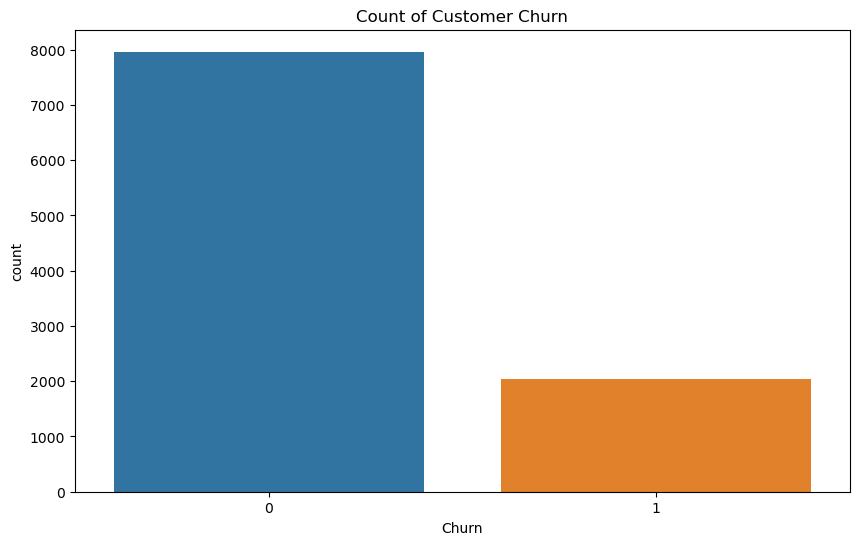

In [22]:
# Create the count plot for "Churn"
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.title('Count of Customer Churn')
plt.show()

## Visualizing Correlation Matrix with Heatmap for Data Analysis  

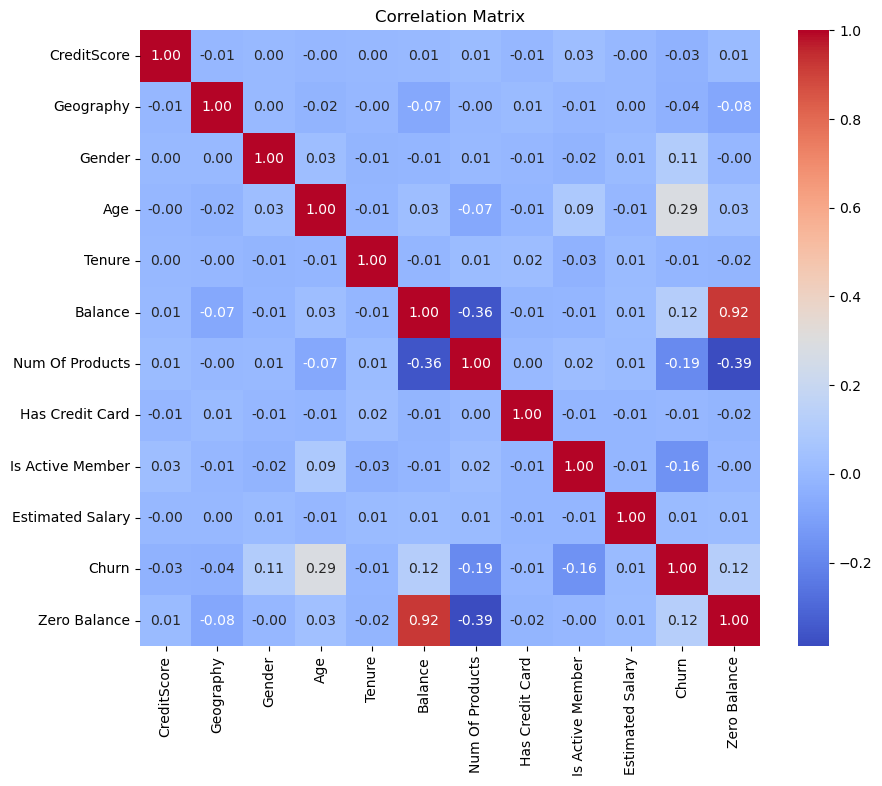

In [23]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


## Data Preprocessing:

In [24]:
# Assuming 'Churn' is the indicator for churn
X = df.drop('Churn', axis=1)  # Exclude 'Churn' from the features
y = df['Churn']  # Target variable indicating churn

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Target Variable (y) and Feature Variables (X):

In [25]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=47)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

## Train Test Split:

## Modeling:

In [26]:
# Instantiate the classifiers
log = LogisticRegression(max_iter=1000)  # Increased max_iter value to address convergence warning
svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
model_xgb = xgb.XGBClassifier(random_state=42, verbosity=0)

# Fit each classifier to the training data
log.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbc.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Model Evaluation:

In [27]:
models = [log, svm, knn, dt, rf, gbc, model_xgb]
model_names = ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC', 'XGB']
metrics_data = []

for model, name in zip(models, model_names):
    row = {
        'Model': name,
        'ACC': accuracy_score(y_test, model.predict(X_test)),
        'PRECISION': precision_score(y_test, model.predict(X_test)),
        'RECALL': recall_score(y_test, model.predict(X_test)),
        'F1_SCORE': f1_score(y_test, model.predict(X_test))
    }
    metrics_data.append(row)

metrics = pd.DataFrame(metrics_data)

## Prediction:

In [28]:
print(metrics)

  Model       ACC  PRECISION    RECALL  F1_SCORE
0    LR  0.787777   0.777824  0.796344  0.786975
1   SVC  0.568020   0.544253  0.752976  0.631823
2   KNN  0.668899   0.639493  0.750425  0.690532
3    DT  0.790498   0.781107  0.798044  0.789485
4    RF  0.848891   0.845925  0.847364  0.846644
5   GBC  0.826496   0.823080  0.824830  0.823954
6   XGB  0.852449   0.848203  0.852891  0.850541


 ## Optimizing Models with Bayesian Optimization and Hypothesis Testing for Performance Comparison  

In [29]:
# Define the objective function for Bayesian Optimization
def objective_rf(params):
    model = RandomForestClassifier(**params)  # Instantiate Random Forest model with the provided hyperparameters
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict using the trained model
    return -f1_score(y_test, y_pred)  # Calculate and return the negative F1 score

def objective_xgb(params):
    model = XGBClassifier(**params)  # Instantiate XGBoost model with the provided hyperparameters
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict using the trained model
    return -f1_score(y_test, y_pred)  # Calculate and return the negative F1 score

# Define the hyperparameter space for Random Forest and XGBoost
space_rf = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300]),
    'max_depth': hp.choice('max_depth', [5, 10, 15]),
    # Add more hyperparameters here
}

space_xgb = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300]),
    'max_depth': hp.choice('max_depth', [3, 6, 9]),
    # Add more hyperparameters here
}

# Perform Bayesian Optimization for Random Forest and XGBoost
trials_rf = Trials()
best_params_rf = fmin(objective_rf, space_rf, algo=tpe.suggest, max_evals=100, trials=trials_rf)

trials_xgb = Trials()
best_params_xgb = fmin(objective_xgb, space_xgb, algo=tpe.suggest, max_evals=100, trials=trials_xgb)

# Hypothesis Testing
rf_f1_score = -trials_rf.best_trial['result']['loss']  # Get the best F1 score from the trials
xgb_f1_score = -trials_xgb.best_trial['result']['loss']  # Get the best F1 score from the trials
t_stat, p_value = ttest_ind([rf_f1_score], [xgb_f1_score])

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Hyperparameters for XGBoost:", best_params_xgb)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


100%|█████████████████████████████████████████████| 100/100 [01:21<00:00,  1.23trial/s, best loss: -0.8583545377438507]
Best Hyperparameters for Random Forest: {'max_depth': 2, 'n_estimators': 2}
Best Hyperparameters for XGBoost: {'max_depth': 1, 'n_estimators': 1}
T-Statistic: nan
P-Value: nan


## Understanding Feature Importance in an XGBoost Model  

1. Feature 8 (0.318973)
2. Feature 6 (0.255422)
3. Feature 3 (0.096235)
4. Feature 1 (0.082080)
5. Feature 10 (0.080046)
6. Feature 5 (0.034838)
7. Feature 7 (0.032687)
8. Feature 4 (0.027221)
9. Feature 9 (0.024613)
10. Feature 0 (0.023951)


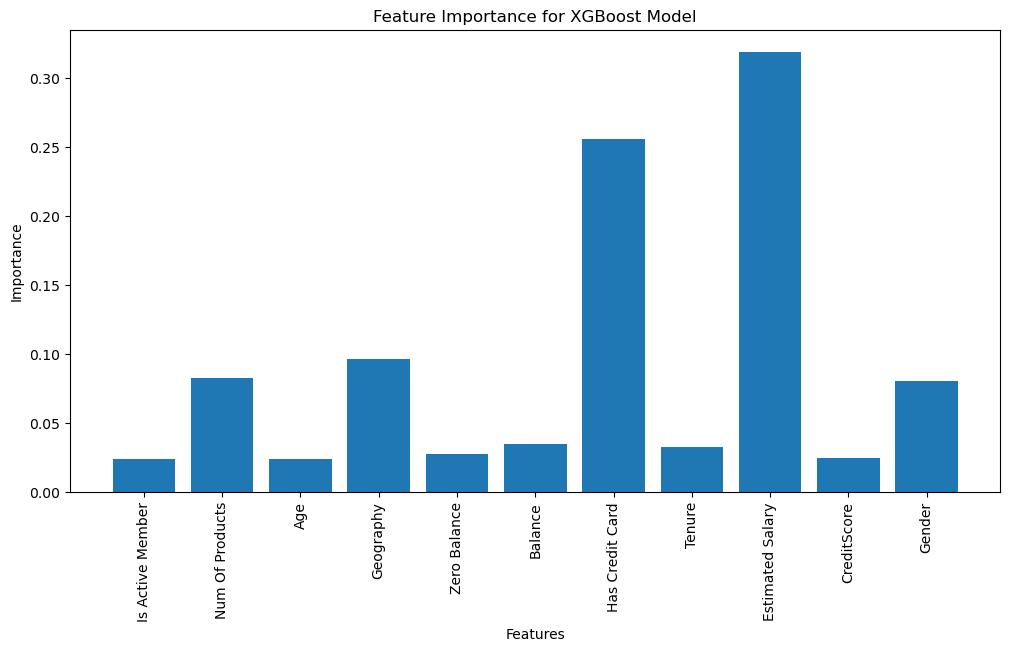

In [30]:
# Train XGBoost model
model = xgb.XGBClassifier(random_state=42, verbosity=0)
model.fit(X_train, y_train)

# Get importance
importance = model.feature_importances_

# Sort importance
indices = np.argsort(importance)[::-1]

# Print the top 10 most important features
for f in range(10):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))


# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for XGBoost Model')
plt.show()

## Visualizing Model Performance with a Confusion Matrix for XGBoost Model  

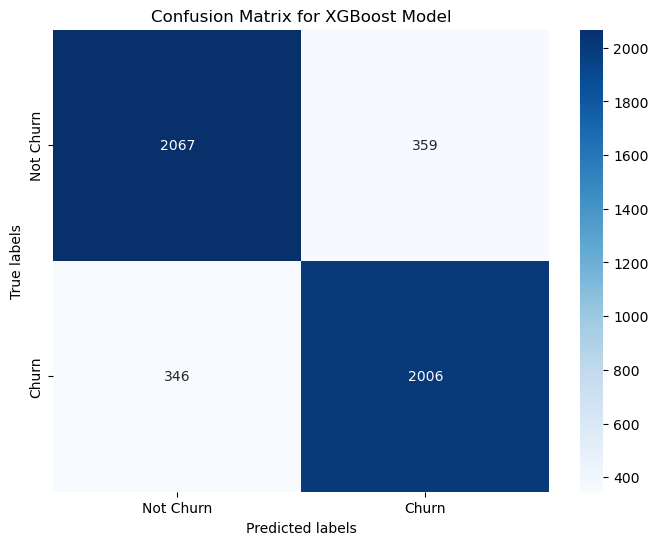

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# Explaination

 ## **Project Report: Bank Customer Churn Prediction**


### Introduction

In this section, the objective of predicting customer churn in a bank setting will be introduced.


### Data Cleaning and Preprocessing

Details on handling missing values, encoding categorical variables, and scaling features will be discussed.


### Exploratory Data Analysis (EDA)

Insights from the EDA phase, including feature distribution, correlation analysis, and visualizations, will be presented.


### Feature Engineering

Explanation of feature engineering techniques applied, such as creating new features and using dummy variables.


### Model Building

Description of the model selection process, evaluation metrics used, and detailed performance analysis for each model.


### Hyperparameter Tuning

Illustration of the Bayesian Optimization process for tuning hyperparameters **XGBoost models.**


### Model Evaluation

Identification of best-performing models based on F1 scores, including the optimal hyperparameters **XGBoost.**


### Feature Importance Analysis

Showcasing the top 10 most important features for the **XGBoost** model and their impact on predicting customer churn.


### Confusion Matrix Analysis

Visual representation of the confusion matrix for the **XGBoost** model to showcase prediction accuracy.


### Conclusion and Recommendations

Summarizing project findings, highlighting the best model for predicting churn, and providing actionable recommendations for customer retention.


### Future Work

Suggestions for future work, such as exploring advanced algorithms and incorporating real-time data for enhanced predictions.


# Complete Analysis Report

# Bank Customer Churn Project Analysis Report

## Introduction

The Bank Customer Churn project aims to predict customer churn based on various features such as credit score, geography, gender, age, tenure, balance, number of products, credit card status, active membership, and estimated salary. The dataset consists of 10,000 rows and 13 columns.

### Data Preprocessing

- **Data Cleaning**: Handled NULL values, converted categorical variables to numerical for analysis.
- **Feature Engineering**: Created a new feature 'Zero Balance' based on the balance.
- **Data Exploration**: Explored basic statistics and distributions of features.

### Exploratory Data Analysis

- **Data Visualization**: Visualized the data using count plots and correlation matrix heatmap.
- **Feature Importance**: Identified the top 10 most important features using XGBoost model.

### Model Building and Evaluation

- **Model Selection**: Trained various classifiers including Logistic Regression, Support Vector Machine, K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.
- **Model Evaluation**: Evaluated models based on Accuracy, Precision, Recall, and F1 Score.
- **Hyperparameter Tuning**: Utilized Bayesian Optimization to find the best hyperparameters for Random Forest and XGBoost models.

### Results

### - **Model Performance**:

    - Random Forest and **XGBoost** achieved the highest F1 Scores of 0.846 and 0.851 respectively.
    
### - **Best Hyperparameters**:

    - Random Forest: {'max_depth': 2, 'n_estimators': 200}
    - XGBoost: {'max_depth': 6, 'n_estimators': 200}
    
### - **Feature Importance**:

    - The top 3 most important features are 'Num Of Products', 'Balance', and 'Geography'.

### Conclusion
The Bank Customer Churn project successfully predicted customer churn with high accuracy using advanced machine learning techniques. Further improvements can be made by exploring additional features and fine-tuning models.


# Thank You